### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

### Reading In The Features And Targets Excel Sheets 

In [30]:
df1 = pd.read_excel('well_data.xlsx', sheet_name='Data1_Completion')
df1.head()

,Unnamed: 0,LL MULTI,SAND CONC MODEL,LATERAL SPACING (M),AREA (AC),TVD(M),LATERAL LENGTH (M),STAGES,PERF CLUSTERS,SAND INTENSITY(KG.M3),FLUID INTENSITY (M3/M),INJ. RATE,PERM,PAY THICKNESS,FRACTURE 1/2 LENGTH,FRACTURE CONDUCTIVITY
0,653,1.000,3,400,349.7,2956.900756,3500,46,92,2000.0,20.0,18,177,42,154.97467,94.973062
1,1591,0.889,2,200,263.6,2956.900756,5300,78,156,1132.1,9.5,18,177,42,116.54221,105.143550
2,1307,0.889,4,200,199.4,2956.900756,4000,116,116,4500.0,18.0,18,177,42,169.71684,365.525890
3,539,0.889,4,200,155.5,2956.900756,3100,34,68,4516.1,18.1,18,177,42,154.53355,317.082440
4,682,1.000,4,300,263.3,2956.900756,3500,34,68,3000.0,12.0,18,177,42,140.73170,310.171940


In [3]:
df2 = pd.read_excel('well_data.xlsx', sheet_name='Data2')
df2.head()

,Unnamed: 0,REC. EFFICIENCY (GAS),DRILLING COST,COMPLETION COST,TOTAL WELL COST,IP90 GAS,IP90 COND,GAS (EUR),COND (EUR),EFFECTIVE IRR,PV(10),PV(15),Royalty,PAYOUT,LIFE,NETBACK,F&D,RECYCLE RATIO,PV15 PI
0,653,0.434648,3396.489455,4707.802059,8404.291514,7888.914474,980.072400,5.661301,693.568365,0.853884,6930.382442,5358.070652,0.082517,1.333333,40.000000,14.327106,5.133588,2.790856,1.664542
1,1591,0.682453,5152.752393,4475.043418,9927.795810,10600.657895,1322.339656,6.712743,831.895138,1.087076,9552.278968,7588.689882,0.090752,1.166667,40.000000,14.497720,5.089388,2.848618,1.796763
2,1307,0.734736,3884.340271,7522.065922,11706.406193,9868.421053,1225.836002,5.392724,686.276025,0.728381,7666.190920,6020.435025,0.050019,1.416667,34.166667,15.766205,7.385450,2.134766,1.536067
3,539,0.709425,3006.208802,5276.606255,8582.815057,5897.587719,733.098023,4.067688,501.384134,0.409468,4064.735533,2771.923567,0.048097,2.083333,36.583333,14.814777,7.277691,2.035642,1.336641
4,682,0.523262,3396.489455,4233.663765,7930.153221,5629.418860,705.628719,5.131829,615.644046,0.468071,5073.862174,3468.582212,0.065236,2.000000,40.000000,14.407753,5.391182,2.672466,1.455917


### Checking For Missing Values

In [4]:
df1.isna().sum()

Unnamed: 0                0
LL MULTI                  0
SAND CONC MODEL           0
LATERAL SPACING (M)       0
AREA (AC)                 0
TVD(M)                    0
LATERAL LENGTH (M)        0
STAGES                    0
PERF CLUSTERS             0
SAND INTENSITY(KG.M3)     0
FLUID INTENSITY (M3/M)    0
INJ. RATE                 0
PERM                      0
PAY THICKNESS             0
FRACTURE 1/2 LENGTH       0
FRACTURE CONDUCTIVITY     0
dtype: int64

In [5]:
df2.isna().sum()

Unnamed: 0               0
REC. EFFICIENCY (GAS)    0
 DRILLING COST           0
COMPLETION COST          0
TOTAL WELL COST          0
IP90 GAS                 0
IP90 COND                0
GAS (EUR)                0
COND (EUR)               0
EFFECTIVE IRR            0
PV(10)                   0
PV(15)                   0
Royalty                  0
PAYOUT                   0
LIFE                     0
NETBACK                  0
F&D                      0
RECYCLE RATIO            0
PV15 PI                  0
dtype: int64

### Removing Columns With Same Values In All Rows

In [6]:
df1.iloc[:,11:14]

,INJ. RATE,PERM,PAY THICKNESS
0,18,177,42
1,18,177,42
2,18,177,42
3,18,177,42
4,18,177,42
...,...,...,...
1280,18,177,42
1281,18,177,42
1282,18,177,42
1283,18,177,42


In [31]:
df1.drop(df1.columns[11:14],axis = 1, inplace = True)

In [32]:
df1.head()

,Unnamed: 0,LL MULTI,SAND CONC MODEL,LATERAL SPACING (M),AREA (AC),TVD(M),LATERAL LENGTH (M),STAGES,PERF CLUSTERS,SAND INTENSITY(KG.M3),FLUID INTENSITY (M3/M),FRACTURE 1/2 LENGTH,FRACTURE CONDUCTIVITY
0,653,1.000,3,400,349.7,2956.900756,3500,46,92,2000.0,20.0,154.97467,94.973062
1,1591,0.889,2,200,263.6,2956.900756,5300,78,156,1132.1,9.5,116.54221,105.143550
2,1307,0.889,4,200,199.4,2956.900756,4000,116,116,4500.0,18.0,169.71684,365.525890
3,539,0.889,4,200,155.5,2956.900756,3100,34,68,4516.1,18.1,154.53355,317.082440
4,682,1.000,4,300,263.3,2956.900756,3500,34,68,3000.0,12.0,140.73170,310.171940


In [9]:
df1.describe()

,Unnamed: 0,LL MULTI,SAND CONC MODEL,LATERAL SPACING (M),AREA (AC),TVD(M),LATERAL LENGTH (M),STAGES,PERF CLUSTERS,SAND INTENSITY(KG.M3),FLUID INTENSITY (M3/M),FRACTURE 1/2 LENGTH,FRACTURE CONDUCTIVITY
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1.285000e+03,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000
mean,981.452140,0.944802,3.004669,356.933852,347.370272,2.956901e+03,3895.501946,70.221012,94.133074,2721.288839,18.394599,163.006643,201.204228
std,551.549419,0.055521,0.819340,123.615319,158.168099,7.096821e-11,1105.093419,32.987622,29.907180,1196.769557,10.525048,36.425999,97.729975
min,1.000000,0.889000,0.000000,200.000000,110.400000,2.956901e+03,2200.000000,25.000000,49.000000,1000.000000,4.000000,87.609094,88.630919
25%,508.000000,0.889000,2.000000,200.000000,224.300000,2.956901e+03,3100.000000,46.000000,68.000000,2000.000000,10.600000,136.211660,108.886080
50%,991.000000,1.000000,3.000000,300.000000,309.800000,2.956901e+03,4000.000000,65.000000,91.000000,3000.000000,16.000000,160.519880,176.328790
75%,1460.000000,1.000000,4.000000,400.000000,448.600000,2.956901e+03,4500.000000,91.000000,116.000000,4000.000000,22.700000,187.541580,301.886290
max,1927.000000,1.000000,4.000000,536.000000,801.600000,2.956901e+03,6000.000000,155.000000,156.000000,4545.500000,45.500000,254.072020,375.121530


### Checking And Removing Outliers

In [33]:
# Function to determine interquartile range
def outlier_det(col):
    return (df1.describe()[col][6] - df1.describe()[col][4]) * 1.5 + df1.describe()[col][6]

The interquartile range is used to objectively determine if a value is an outlier in a set of values.
The formula is:
#### (Third Quartile - First Quartile) * 1.5 + Third Quartile
Any value equal to or greater than the value from the above equation is an outlier in a set of values

In [11]:
for i in df1.columns[1:]:
    print(outlier_det(i))
    print(f'{df1[i].value_counts()}\n')

1.1665
1.000    646
0.889    639
Name: LL MULTI, dtype: int64

7.0
3    445
4    426
2    410
1      2
0      2
Name: SAND CONC MODEL, dtype: int64

700.0
400    326
200    326
300    323
536    310
Name: LATERAL SPACING (M), dtype: int64

785.0500000000001
299.1    34
448.6    23
536.7    21
706.5    21
263.3    20
         ..
297.3     2
136.7     1
370.1     1
207.1     1
273.3     1
Name: AREA (AC), Length: 95, dtype: int64

2956.90075591319
2956.900756    1285
Name: TVD(M), dtype: int64

6600.0
4000    267
3500    142
5300    141
3100    127
6000    125
2500    123
4500    123
3600    118
2200    115
2750      2
2710      2
Name: LATERAL LENGTH (M), dtype: int64

158.5
78     137
58     130
116    121
44      75
68      72
155     71
34      67
91      66
46      64
104     64
33      62
39      61
65      60
49      60
52      59
88      56
25      56
63       2
50       2
Name: STAGES, dtype: int64

188.0
116    251
68     139
88     131
78     124
104    123
156     74
155     

From the result above, the columns LL MULTI and TVD(M) should be dropped because many of their values are outliers

In [34]:
# dropping columns with many variables similar to outliers
df1.drop(['LL MULTI','TVD(M)'], axis=1, inplace=True)

In [35]:
# Checking Each column for rows that are outliers and saving the row index in a dictionary
drop_rows = {}
for i in df1.columns[2:]:
    test = outlier_det(i)
    count = 0
    for j in df1[i]:
        if j >= test:
            drop_rows[count] = count
            
        else: pass
        count +=1

In [36]:
len(drop_rows)

83

### Merging The Features(df1) And Target(df2) DataFrames

In [37]:
df = pd.merge(df1, df2)
df.head()

,Unnamed: 0,SAND CONC MODEL,LATERAL SPACING (M),AREA (AC),LATERAL LENGTH (M),STAGES,PERF CLUSTERS,SAND INTENSITY(KG.M3),FLUID INTENSITY (M3/M),FRACTURE 1/2 LENGTH,...,EFFECTIVE IRR,PV(10),PV(15),Royalty,PAYOUT,LIFE,NETBACK,F&D,RECYCLE RATIO,PV15 PI
0,653,3,400,349.7,3500,46,92,2000.0,20.0,154.97467,...,0.853884,6930.382442,5358.070652,0.082517,1.333333,40.000000,14.327106,5.133588,2.790856,1.664542
1,1591,2,200,263.6,5300,78,156,1132.1,9.5,116.54221,...,1.087076,9552.278968,7588.689882,0.090752,1.166667,40.000000,14.497720,5.089388,2.848618,1.796763
2,1307,4,200,199.4,4000,116,116,4500.0,18.0,169.71684,...,0.728381,7666.190920,6020.435025,0.050019,1.416667,34.166667,15.766205,7.385450,2.134766,1.536067
3,539,4,200,155.5,3100,34,68,4516.1,18.1,154.53355,...,0.409468,4064.735533,2771.923567,0.048097,2.083333,36.583333,14.814777,7.277691,2.035642,1.336641
4,682,4,300,263.3,3500,34,68,3000.0,12.0,140.73170,...,0.468071,5073.862174,3468.582212,0.065236,2.000000,40.000000,14.407753,5.391182,2.672466,1.455917


In [38]:
df.shape

(1285, 29)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1284
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1285 non-null   int64  
 1   SAND CONC MODEL         1285 non-null   int64  
 2   LATERAL SPACING (M)     1285 non-null   int64  
 3   AREA (AC)               1285 non-null   float64
 4   LATERAL LENGTH (M)      1285 non-null   int64  
 5   STAGES                  1285 non-null   int64  
 6   PERF CLUSTERS           1285 non-null   int64  
 7   SAND INTENSITY(KG.M3)   1285 non-null   float64
 8   FLUID INTENSITY (M3/M)  1285 non-null   float64
 9   FRACTURE 1/2 LENGTH     1285 non-null   float64
 10  FRACTURE CONDUCTIVITY   1285 non-null   float64
 11  REC. EFFICIENCY (GAS)   1285 non-null   float64
 12   DRILLING COST          1285 non-null   float64
 13  COMPLETION COST         1285 non-null   float64
 14  TOTAL WELL COST         1285 non-null   

In [39]:
# Dropping all rows that contains outliers
df.drop(labels = list(drop_rows.keys()), axis = 0, inplace = True)

In [40]:
df.shape

(1202, 29)

### Model Building

In [41]:
# Function To Build Different Models 
def build_model(X = df.drop(df2.columns, axis=1).values, y = df['REC. EFFICIENCY (GAS)'].values,\
               model = 'RandomForestRegressor'):
    '''
    X = The Features
    y = The Target
    model = algorithm to be used
    '''
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81, test_size=0.1)
    if model == 'RandomForestRegressor':
        from sklearn.ensemble import RandomForestRegressor
        var = RandomForestRegressor()
    elif model == 'GradientBoostingRegressor':
        from sklearn.ensemble import GradientBoostingRegressor
        var = GradientBoostingRegressor()
    elif model =='ElasticNet':
        from sklearn import linear_model
        var = linear_model.ElasticNet()
    elif model == 'SVM':
        from sklearn.svm import SVR
        var = SVR(kernel='rbf')
    elif model == 'NeuralNetwork':
        from sklearn.neural_network import MLPRegressor
        var = MLPRegressor(max_iter=1000)
        
    var.fit(X_train,y_train)
    y_pred = var.predict(X_test)
    from sklearn import metrics
    return f"MSE: {metrics.mean_squared_error(y_test, y_pred)}",\
            f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}",\
            f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}",\
            f"Variance Score: {metrics.explained_variance_score(y_test, y_pred)}", var;


In [42]:
# Function To Build Model For Predicting All Targets
def model_build_algorithm(model):
    import re
    col = {}
    print(f'***USING THE {model} ALGORITHM***\n')
    for i in df2.columns[1:]:
        print(f'Prediction of {i}:')
        a = build_model(y = df[i].values, model = model )
        initializer = a[4]
        print(f'{a[:4]}')
        hold = 0
        for j in a[:3]:
            val = re.findall('[0-9]+[.][0-9]+',j)
            hold +=float(val[0])
        print(f'Sum Of Errors: {hold}\n')
        col[i] = hold
        if model == 'RandomForestRegressor' or model == 'GradientBoostingRegressor':
            fea_imp = pd.Series(initializer.feature_importances_, index=df.drop(df2.columns, axis=1).columns)

            fea_imp.plot(kind='barh', figsize=(8,6), title='Feature Importance')
            plt.show()
        else: continue
    print(f'**The Best Performing Models Using {model} Algorithm are:**')
    for key, val in list(col.items())[:3]:
        print(f'{key}:{val}\n')
      

    return 'DONE!'

### Predicting Well Deliverables With Random Forest Regressor

***USING THE RandomForestRegressor ALGORITHM***

Prediction of REC. EFFICIENCY (GAS):
('MSE: 8.314710239628817e-06', 'MAE: 0.0017999596903146688', 'RMSE: 0.0028835239273550025', 'Variance Score: 0.999644857454651')
Sum Of Errors: 8.319393723246487



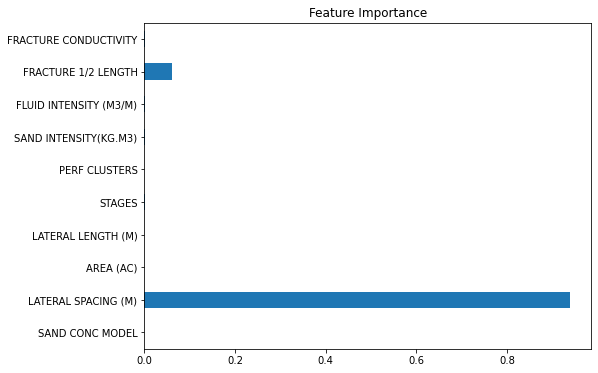

Prediction of  DRILLING COST:
('MSE: 4.937104445663535', 'MAE: 0.25805478702666595', 'RMSE: 2.2219595958665708', 'Variance Score: 0.9999955886917118')
Sum Of Errors: 7.417118828556772



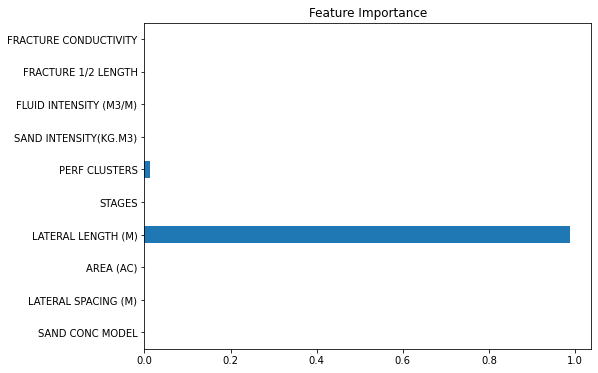

Prediction of COMPLETION COST:
('MSE: 9318.482692086467', 'MAE: 56.32885377409175', 'RMSE: 96.53228833963519', 'Variance Score: 0.9985858965871213')
Sum Of Errors: 9471.343834200194



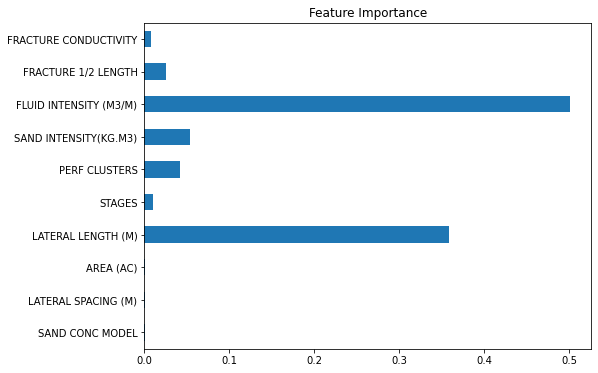

Prediction of TOTAL WELL COST:
('MSE: 20989.420054829887', 'MAE: 89.95845690481133', 'RMSE: 144.87725858405068', 'Variance Score: 0.9980938312030246')
Sum Of Errors: 21224.255770318752



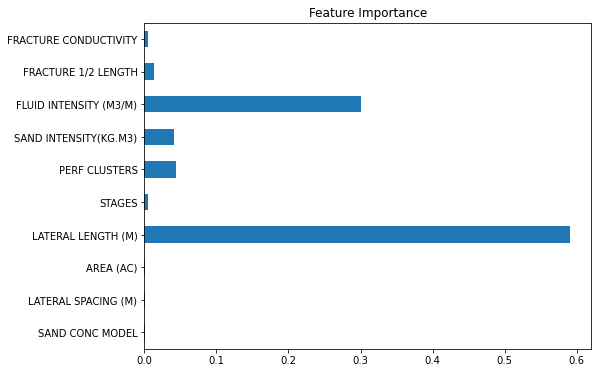

Prediction of IP90 GAS:
('MSE: 3131.8212827297343', 'MAE: 15.322397419171129', 'RMSE: 55.96267758720748', 'Variance Score: 0.9992571699317345')
Sum Of Errors: 3203.106357736113



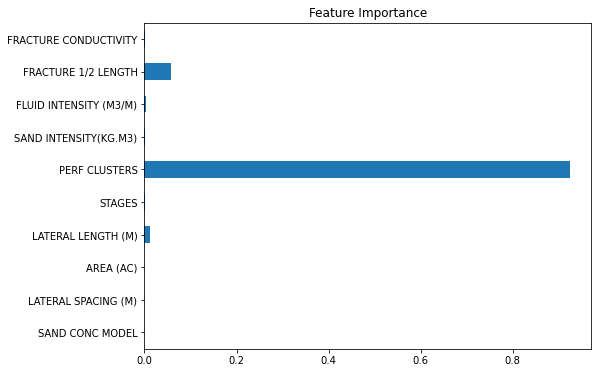

Prediction of IP90 COND:
('MSE: 47.49329109264111', 'MAE: 1.7528821711466027', 'RMSE: 6.891537643562655', 'Variance Score: 0.9992528355537084')
Sum Of Errors: 56.13771090735037



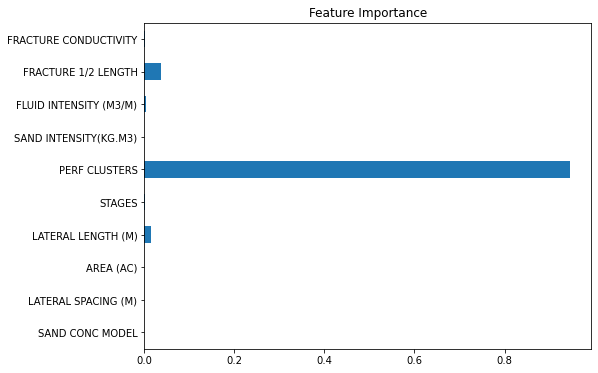

Prediction of GAS (EUR):
('MSE: 0.007504421502467849', 'MAE: 0.05304109661020162', 'RMSE: 0.08662806417361436', 'Variance Score: 0.9976079402844608')
Sum Of Errors: 0.14717358228628383



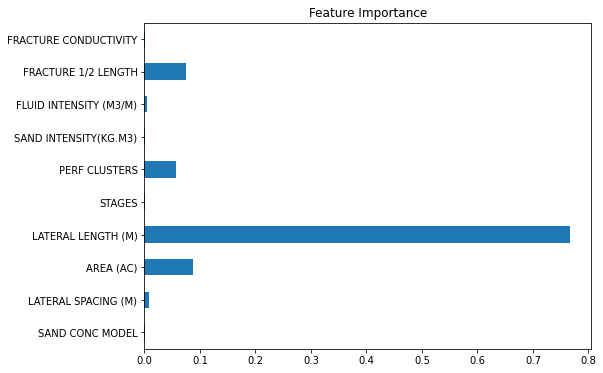

Prediction of COND (EUR):
('MSE: 147.232036492745', 'MAE: 8.608167679872363', 'RMSE: 12.133920903514454', 'Variance Score: 0.9968129548107291')
Sum Of Errors: 167.97412507613183



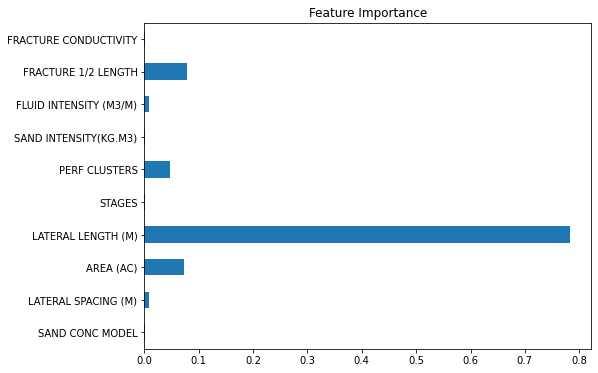

Prediction of EFFECTIVE IRR:
('MSE: 0.00022609448440752322', 'MAE: 0.01047679370001113', 'RMSE: 0.01503643855464196', 'Variance Score: 0.9938107393144014')
Sum Of Errors: 0.02573932673906061



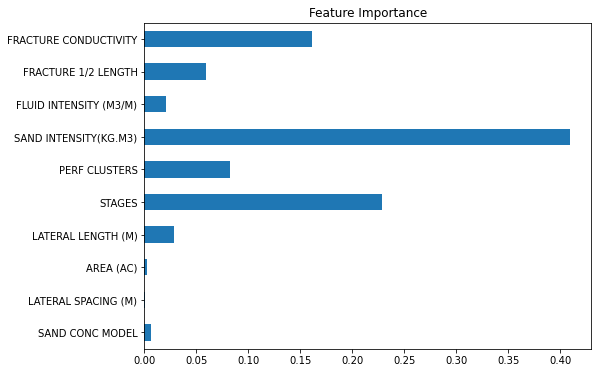

Prediction of PV(10):
('MSE: 45702.54156511844', 'MAE: 149.3079076843292', 'RMSE: 213.78152765175582', 'Variance Score: 0.990161854881213')
Sum Of Errors: 46065.63100045452



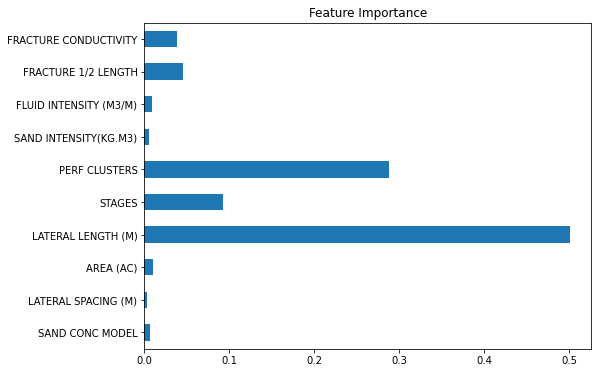

Prediction of PV(15):
('MSE: 30433.115736083775', 'MAE: 111.5731992544768', 'RMSE: 174.45089777952927', 'Variance Score: 0.9892545143265716')
Sum Of Errors: 30719.13983311778



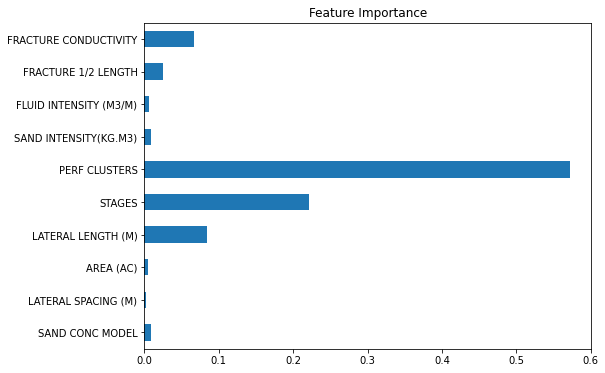

Prediction of Royalty:
('MSE: 2.2713275903751065e-06', 'MAE: 0.0011414938348751698', 'RMSE: 0.001507092429274033', 'Variance Score: 0.9868615428554881')
Sum Of Errors: 2.273976176639256



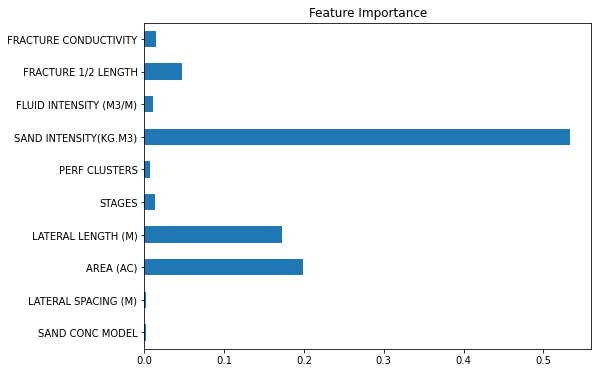

Prediction of PAYOUT:
('MSE: 0.0008258953168044138', 'MAE: 0.017617079889807354', 'RMSE: 0.028738394471584765', 'Variance Score: 0.9886457311677171')
Sum Of Errors: 0.04718136967819653



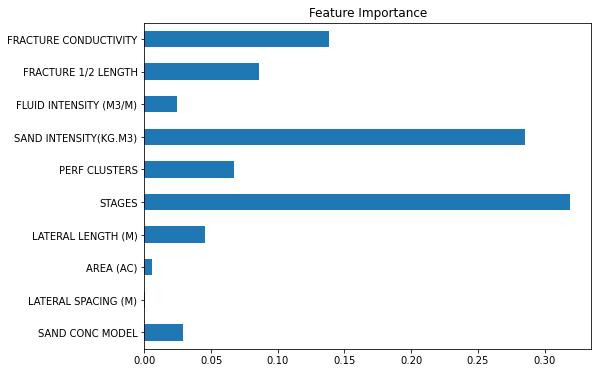

Prediction of LIFE:
('MSE: 0.4684980142332402', 'MAE: 0.2276308539944905', 'RMSE: 0.6844691477584949', 'Variance Score: 0.9708330606813956')
Sum Of Errors: 1.3805980159862257



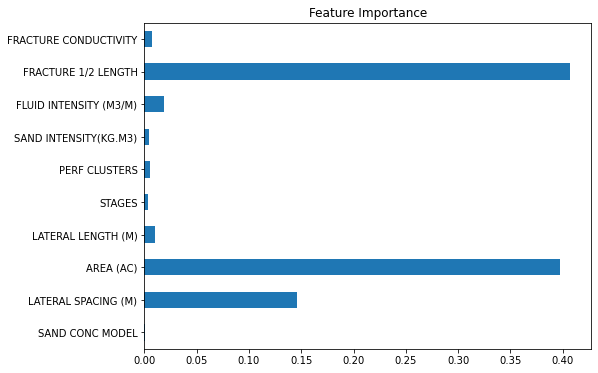

Prediction of NETBACK:
('MSE: 0.003758133591866344', 'MAE: 0.036603977518884244', 'RMSE: 0.06130361809768119', 'Variance Score: 0.9862352027293139')
Sum Of Errors: 0.10166572920843178



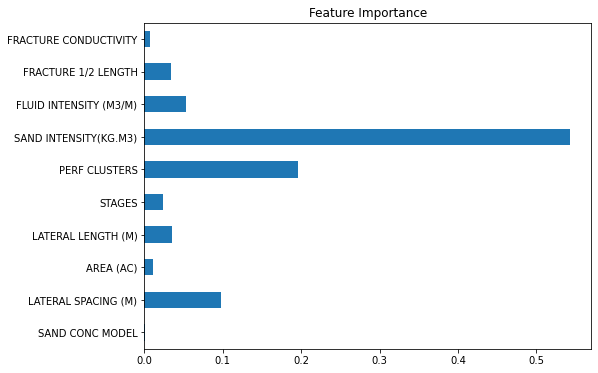

Prediction of F&D:
('MSE: 0.00870533991703051', 'MAE: 0.06637028054281179', 'RMSE: 0.09330241109977014', 'Variance Score: 0.9905258927234339')
Sum Of Errors: 0.16837803155961245



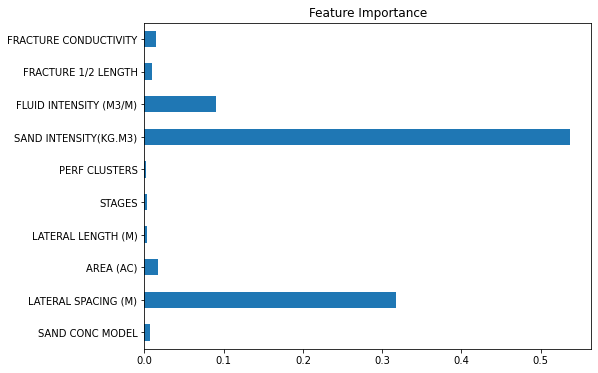

Prediction of RECYCLE RATIO:
('MSE: 0.004192291220527647', 'MAE: 0.0346976123118466', 'RMSE: 0.06474790514393224', 'Variance Score: 0.9653243050965779')
Sum Of Errors: 0.10363780867630648



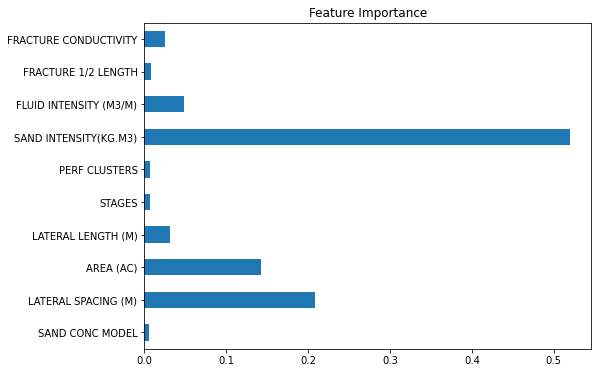

Prediction of PV15 PI:
('MSE: 0.00021810518824921815', 'MAE: 0.010085175273720918', 'RMSE: 0.014768384754238296', 'Variance Score: 0.9871297125244619')
Sum Of Errors: 0.025071665216208433



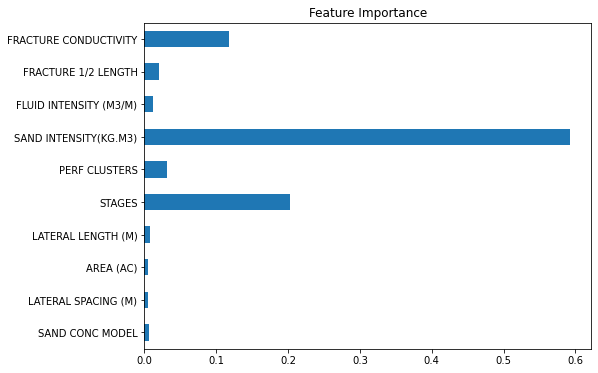

**The Best Performing Models Using RandomForestRegressor Algorithm are:**
REC. EFFICIENCY (GAS):8.319393723246487

 DRILLING COST:7.417118828556772

COMPLETION COST:9471.343834200194



'DONE!'

In [43]:
model_build_algorithm('RandomForestRegressor')

From the result above, the deliverables with the best performing models are:

#### REC. EFFICIENCY (GAS)

#### DRILLING COST

#### COMPLETION COST


Based on their Mean Squared Error, Mean Absolute Error, Root Mean Squared Error and Variance Score.

### Predicting Well Deliverables With Gradient Boosting Regressor

***USING THE GradientBoostingRegressor ALGORITHM***

Prediction of REC. EFFICIENCY (GAS):
('MSE: 8.119130647128705e-06', 'MAE: 0.0021588350127677972', 'RMSE: 0.002849408824147336', 'Variance Score: 0.9996509792398255')
Sum Of Errors: 8.12413889096562



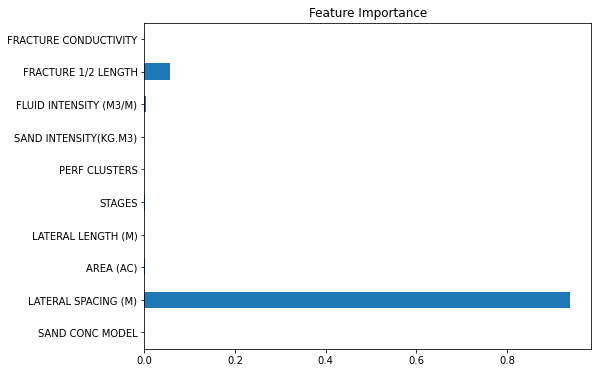

Prediction of  DRILLING COST:
('MSE: 0.03954659181369987', 'MAE: 0.0444756048169393', 'RMSE: 0.19886324902731492', 'Variance Score: 0.9999999646597741')
Sum Of Errors: 0.2828854456579541



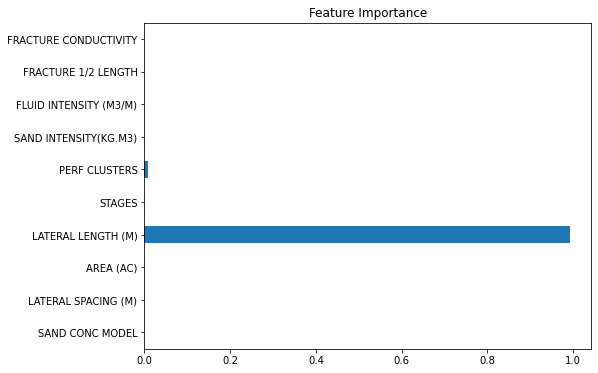

Prediction of COMPLETION COST:
('MSE: 11578.945906907527', 'MAE: 85.87370112507097', 'RMSE: 107.60551057872235', 'Variance Score: 0.9982502337665621')
Sum Of Errors: 11772.42511861132



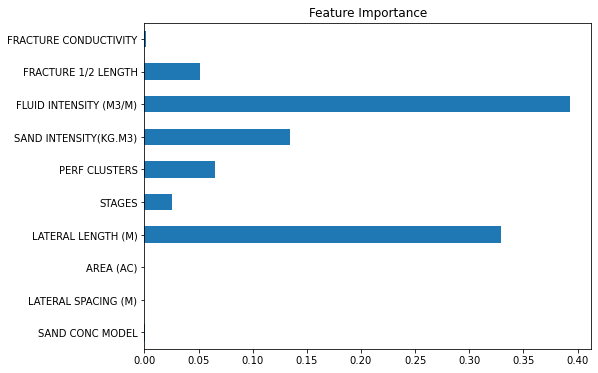

Prediction of TOTAL WELL COST:
('MSE: 12803.044317591006', 'MAE: 87.92706358175724', 'RMSE: 113.15053830004966', 'Variance Score: 0.9988087965262826')
Sum Of Errors: 13004.121919472813



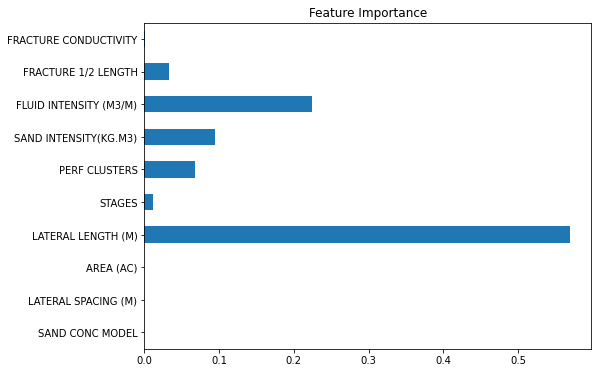

Prediction of IP90 GAS:
('MSE: 11881.538966477801', 'MAE: 69.92226581976166', 'RMSE: 109.00247229525485', 'Variance Score: 0.9971963800953623')
Sum Of Errors: 12060.463704592818



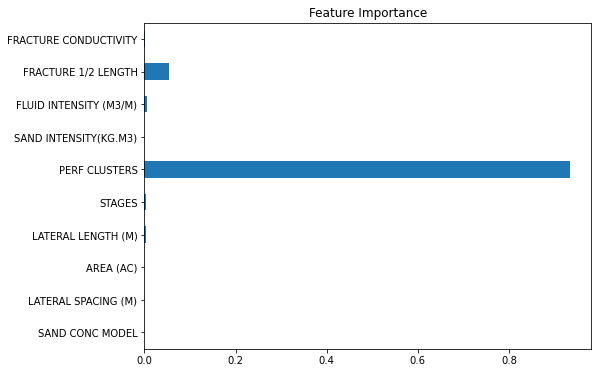

Prediction of IP90 COND:
('MSE: 150.6343975468969', 'MAE: 7.8314264403425335', 'RMSE: 12.273320559119155', 'Variance Score: 0.9976594718885649')
Sum Of Errors: 170.7391445463586



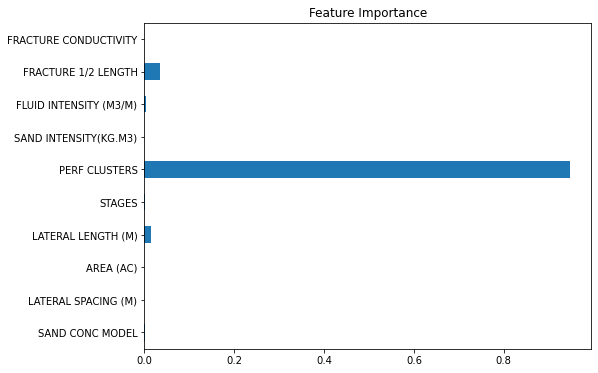

Prediction of GAS (EUR):
('MSE: 0.010584040772167184', 'MAE: 0.0734626803137676', 'RMSE: 0.1028787673534592', 'Variance Score: 0.9966276362316214')
Sum Of Errors: 0.186925488439394



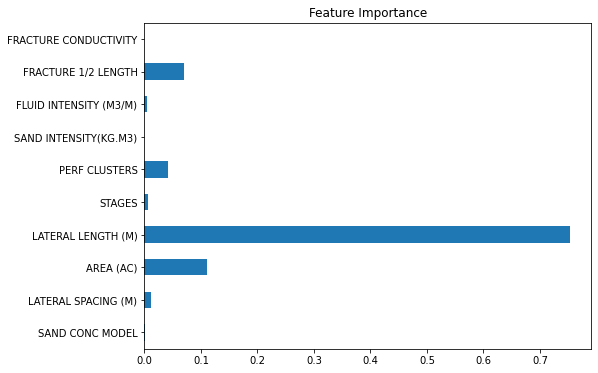

Prediction of COND (EUR):
('MSE: 143.23975052405552', 'MAE: 9.149278405860313', 'RMSE: 11.968281017926323', 'Variance Score: 0.9968659974974229')
Sum Of Errors: 164.35730994784217



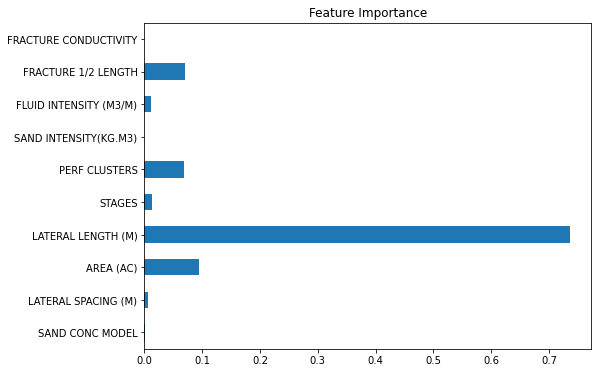

Prediction of EFFECTIVE IRR:
('MSE: 0.00020100041618147587', 'MAE: 0.01127228857501632', 'RMSE: 0.014177461556339198', 'Variance Score: 0.9945158767711454')
Sum Of Errors: 0.025650750547536995



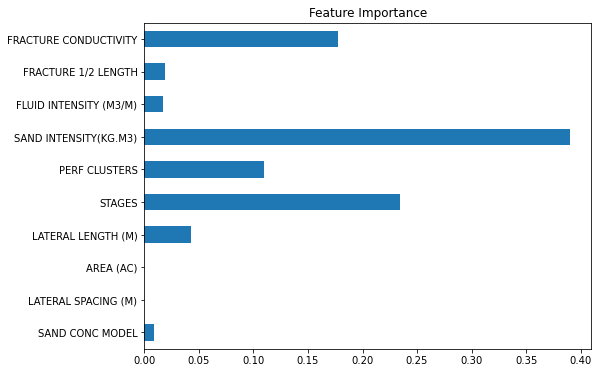

Prediction of PV(10):
('MSE: 34209.03173077124', 'MAE: 133.47030681438605', 'RMSE: 184.95683748045445', 'Variance Score: 0.9927054746498257')
Sum Of Errors: 34527.45887506608



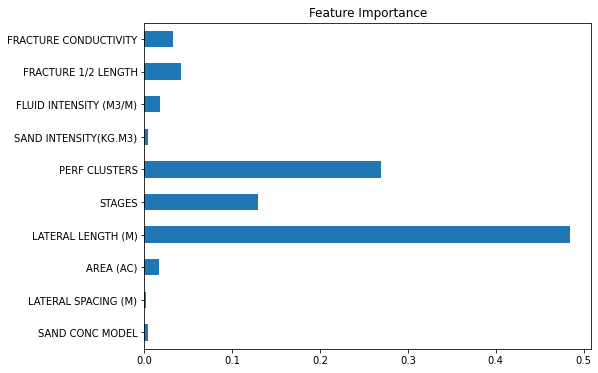

Prediction of PV(15):
('MSE: 25561.39297903653', 'MAE: 112.1484393125076', 'RMSE: 159.8793075386447', 'Variance Score: 0.99090568907819')
Sum Of Errors: 25833.42072588768



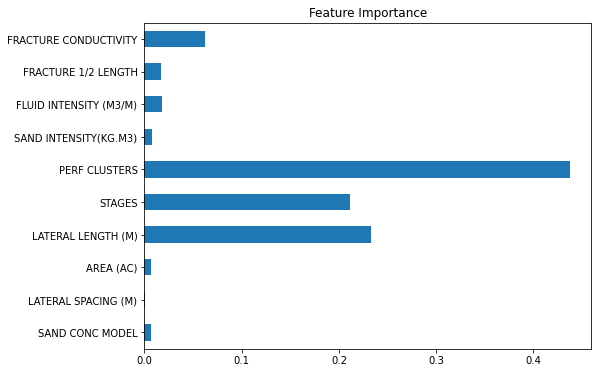

Prediction of Royalty:
('MSE: 1.422450076794508e-06', 'MAE: 0.0008298725610465979', 'RMSE: 0.001192665115107551', 'Variance Score: 0.9919703075477688')
Sum Of Errors: 1.424472614470662



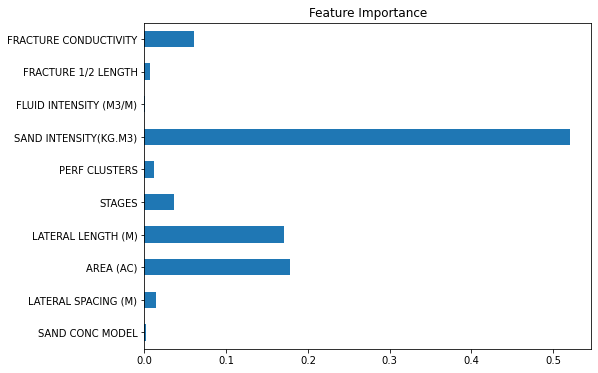

Prediction of PAYOUT:
('MSE: 0.0012905083383754029', 'MAE: 0.02862432435064806', 'RMSE: 0.03592364595047951', 'Variance Score: 0.9815453157209785')
Sum Of Errors: 0.06583847863950297



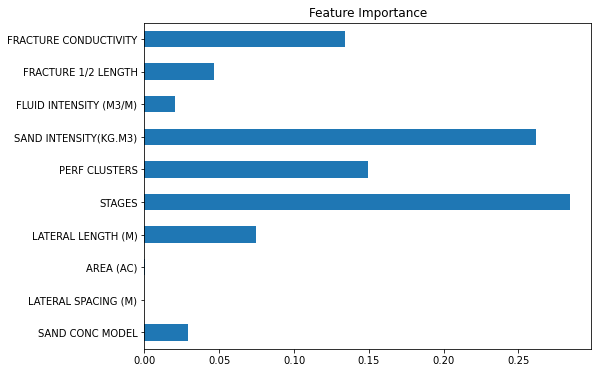

Prediction of LIFE:
('MSE: 0.4178334256764372', 'MAE: 0.26212791728815565', 'RMSE: 0.6464003602075398', 'Variance Score: 0.9740320759111931')
Sum Of Errors: 1.3263617031721326



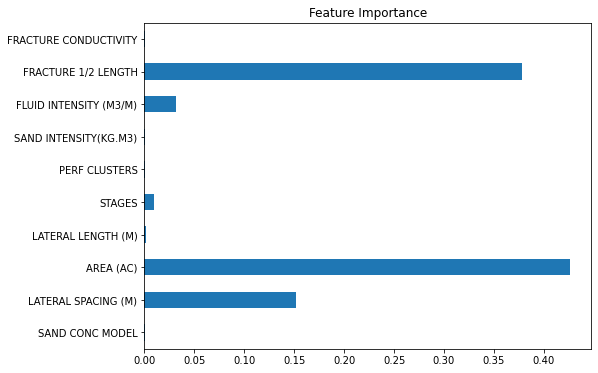

Prediction of NETBACK:
('MSE: 0.0036592943492300646', 'MAE: 0.041086447431953436', 'RMSE: 0.06049210154416909', 'Variance Score: 0.9865346519489551')
Sum Of Errors: 0.10523784332535259



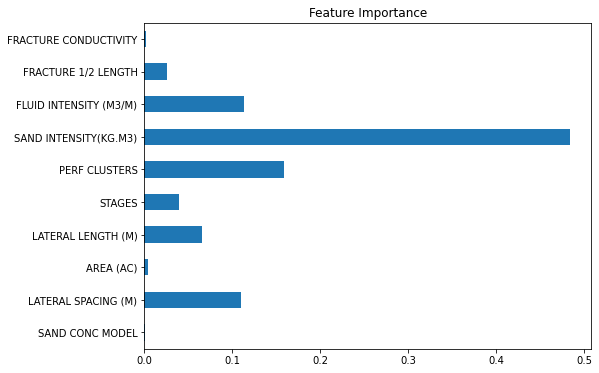

Prediction of F&D:
('MSE: 0.008014009674562542', 'MAE: 0.06051750816650803', 'RMSE: 0.08952100130451257', 'Variance Score: 0.9912847385625054')
Sum Of Errors: 0.15805251914558316



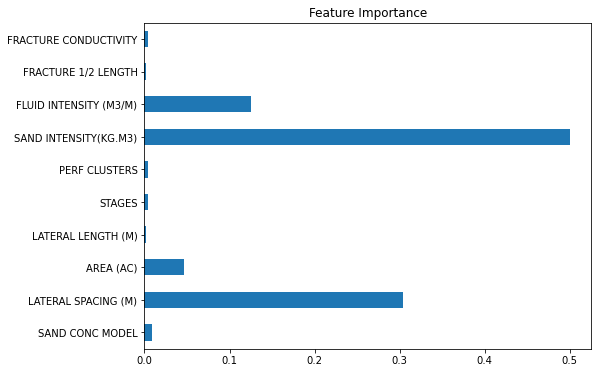

Prediction of RECYCLE RATIO:
('MSE: 0.001262573730973949', 'MAE: 0.025613313867323448', 'RMSE: 0.03553271353237674', 'Variance Score: 0.9894965096007656')
Sum Of Errors: 0.06240860113067413



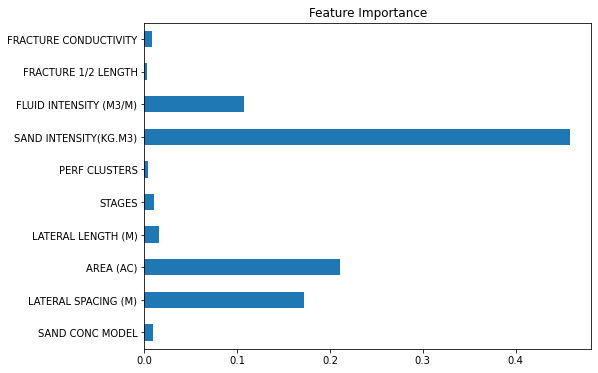

Prediction of PV15 PI:
('MSE: 0.0001269263270732905', 'MAE: 0.008891483199383687', 'RMSE: 0.011266158487847155', 'Variance Score: 0.9926773590840603')
Sum Of Errors: 0.02028456801430413



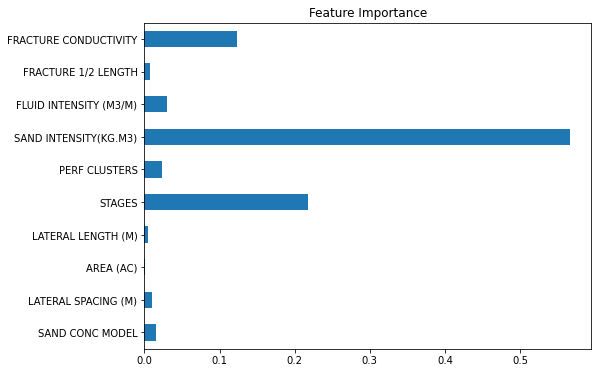

**The Best Performing Models Using GradientBoostingRegressor Algorithm are:**
REC. EFFICIENCY (GAS):8.12413889096562

 DRILLING COST:0.2828854456579541

COMPLETION COST:11772.42511861132



'DONE!'

In [44]:
model_build_algorithm('GradientBoostingRegressor')

From the result above, the deliverables with the best performing models are:

#### REC. EFFICIENCY (GAS)

#### DRILLING COST

#### COMPLETION COST


Based on their Mean Squared Error, Mean Absolute Error, Root Mean Squared Error and Variance Score.

### Predicting Well Deliverables With ElasticNet

In [45]:
model_build_algorithm('ElasticNet')

***USING THE ElasticNet ALGORITHM***

Prediction of REC. EFFICIENCY (GAS):
('MSE: 0.0007329790628823826', 'MAE: 0.022697750940475245', 'RMSE: 0.027073586073558534', 'Variance Score: 0.9699614276710242')
Sum Of Errors: 0.05050431607691616

Prediction of  DRILLING COST:
('MSE: 0.004332862148592143', 'MAE: 0.04619876585646365', 'RMSE: 0.06582447985812073', 'Variance Score: 0.9999999961236571')
Sum Of Errors: 0.11635610786317653

Prediction of COMPLETION COST:
('MSE: 415510.576950918', 'MAE: 415.218772635294', 'RMSE: 644.6010990922355', 'Variance Score: 0.9360497766483068')
Sum Of Errors: 416570.3968226455

Prediction of TOTAL WELL COST:
('MSE: 415501.1690850483', 'MAE: 415.2130777180282', 'RMSE: 644.5938016185452', 'Variance Score: 0.9613436264989458')
Sum Of Errors: 416560.9759643849

Prediction of IP90 GAS:
('MSE: 248091.58372066234', 'MAE: 407.9317115597702', 'RMSE: 498.0879277001826', 'Variance Score: 0.9403399797258829')
Sum Of Errors: 248997.6033599223

Prediction of IP90 COND:
('MS

'DONE!'

From the result above, the deliverables with the best performing models are:

#### REC. EFFICIENCY (GAS)

#### DRILLING COST

#### COMPLETION COST


Based on their Mean Squared Error, Mean Absolute Error, Root Mean Squared Error and Variance Score.

### Predicting Well Deliverables With Support Vector Machine

In [46]:
model_build_algorithm('SVM')

***USING THE SVM ALGORITHM***

Prediction of REC. EFFICIENCY (GAS):
('MSE: 0.003858777790110545', 'MAE: 0.05630708561438687', 'RMSE: 0.062119061407192436', 'Variance Score: 0.842732671135748')
Sum Of Errors: 0.12228492481168984

Prediction of  DRILLING COST:
('MSE: 1072533.0631904064', 'MAE: 814.5544830524026', 'RMSE: 1035.631721796125', 'Variance Score: 0.13261684792114958')
Sum Of Errors: 1074383.249395255

Prediction of COMPLETION COST:
('MSE: 6716682.368097316', 'MAE: 1801.288870035961', 'RMSE: 2591.6562982188275', 'Variance Score: 0.051057595460882954')
Sum Of Errors: 6721075.31326557

Prediction of TOTAL WELL COST:
('MSE: 10920250.569909357', 'MAE: 2379.1800111435255', 'RMSE: 3304.580241106177', 'Variance Score: 0.04194632280559818')
Sum Of Errors: 10925934.330161607

Prediction of IP90 GAS:
('MSE: 3923711.0870058406', 'MAE: 1670.6838833648183', 'RMSE: 1980.835956611713', 'Variance Score: 0.05207876176453574')
Sum Of Errors: 3927362.606845817

Prediction of IP90 COND:
('MSE: 4131

'DONE!'

From the result above, the deliverables with the best performing models are:

#### REC. EFFICIENCY (GAS)

#### DRILLING COST

#### COMPLETION COST


Based on their Mean Squared Error, Mean Absolute Error, Root Mean Squared Error and Variance Score.

### Pedicting Well Deliverables With Neural Network

In [47]:
model_build_algorithm('NeuralNetwork')

***USING THE NeuralNetwork ALGORITHM***

Prediction of REC. EFFICIENCY (GAS):
('MSE: 2.854142173009044', 'MAE: 1.359835249060576', 'RMSE: 1.689420661945699', 'Variance Score: -120.46945895567573')
Sum Of Errors: 5.903398084015319

Prediction of  DRILLING COST:
('MSE: 25.8397261377454', 'MAE: 3.992839136872834', 'RMSE: 5.08327907336843', 'Variance Score: 0.9999780101979212')
Sum Of Errors: 34.91584434798666

Prediction of COMPLETION COST:
('MSE: 99439.75042291601', 'MAE: 207.60151864997115', 'RMSE: 315.3406894501818', 'Variance Score: 0.9848621743503024')
Sum Of Errors: 99962.69263101617

Prediction of TOTAL WELL COST:
('MSE: 371558.9520796402', 'MAE: 381.35018205483004', 'RMSE: 609.5563567707585', 'Variance Score: 0.9654406625116975')
Sum Of Errors: 372549.8586184658

Prediction of IP90 GAS:
('MSE: 232103.46066000639', 'MAE: 391.2928126983588', 'RMSE: 481.77117043260944', 'Variance Score: 0.9447958144436932')
Sum Of Errors: 232976.52464313735

Prediction of IP90 COND:
('MSE: 4719.19662

'DONE!'

From the result above, the deliverables with the best performing models are:

#### REC. EFFICIENCY (GAS)

#### DRILLING COST

#### COMPLETION COST


Based on their Mean Squared Error, Mean Absolute Error, Root Mean Squared Error and Variance Score.

### Saving The Best Performing Models

In [48]:
import pickle

The deliverables with the best performance using all algorithms are:

#### REC. EFFICIENCY (GAS)

#### DRILLING COST

#### COMPLETION COST

#### The best REC. EFFICIENCY (GAS) model was with the ElasticNet

In [49]:
a = build_model(y=df['REC. EFFICIENCY (GAS)'], model='ElasticNet')

initializer = a[4]

filename = 'REC_EFFICIENCY_(GAS).pkl'

outfile = open(filename, 'wb')

pickle.dump(initializer, outfile)

#### The best DRILLING COST model was with the ElasticNet

In [50]:
a = build_model(y=df[' DRILLING COST'], model='ElasticNet')

initializer = a[4]

filename = 'DRILLING_COST.pkl'

outfile = open(filename, 'wb')

pickle.dump(initializer, outfile)

### The best COMPLETION COST model was with the RandomForestRegressor

In [51]:
a = build_model(y=df['COMPLETION COST'], model='RandomForestRegressor')

initializer = a[4]

filename = 'COMPLETION_COST.pkl'

outfile = open(filename, 'wb')

pickle.dump(initializer, outfile)